## Setup and get data

In [1]:
COMPETITION_NAME = 'digit-recognizer' # replace me

# Kaggle competition bootstrapping
!pip install -qq fastai
!pip install -qq kaggle

from fastai.imports import *
np.set_printoptions(linewidth=130)

# get competition data
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    path = Path('../input/'+COMPETITION_NAME)
else:
    DOWNLOADS = Path('downloads')
    import zipfile,kaggle
    path = DOWNLOADS / COMPETITION_NAME
    if not path.is_dir():
        kaggle.api.competition_download_cli(COMPETITION_NAME, path=DOWNLOADS)
        zipfile.ZipFile(f'{path}.zip').extractall(path)
print('done')

100%|██████████| 15.3M/15.3M [00:00<00:00, 26.6MB/s]

done


In [2]:
!ls {path}

sample_submission.csv  test.csv  train.csv


## Data preprocessing
Moving csv format to images in folders

In [3]:
df = pd.read_csv(path/'train.csv')
df.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

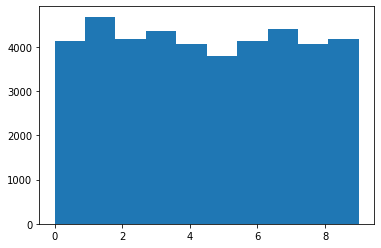

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(df.label)
plt.show()

In [5]:
test_df = pd.read_csv(path/"test.csv")
len(test_df)

28000

In [7]:
#create folders 
TRAIN_IMGS = path / 'train'
TEST_IMGS = path / 'test'
if not TRAIN_IMGS.exists():
    print('creating', TRAIN_IMGS)
    TRAIN_IMGS.mkdir()
if not TEST_IMGS.exists():
    print('creating', TEST_IMGS)
    TEST_IMGS.mkdir()
for i in range(10):
    pi = TRAIN_IMGS/(str(i))
    if not pi.exists():
        print('creating', pi)
        pi.mkdir()

creating downloads/digit-recognizer/train
creating downloads/digit-recognizer/test
creating downloads/digit-recognizer/train/0
creating downloads/digit-recognizer/train/1
creating downloads/digit-recognizer/train/2
creating downloads/digit-recognizer/train/3
creating downloads/digit-recognizer/train/4
creating downloads/digit-recognizer/train/5
creating downloads/digit-recognizer/train/6
creating downloads/digit-recognizer/train/7
creating downloads/digit-recognizer/train/8
creating downloads/digit-recognizer/train/9


In [10]:
from PIL import Image
images = []
def saveMNIST(digit, filepath):
    digit = digit.reshape(28,28)
    digit = digit.astype(np.uint8)

    img = Image.fromarray(digit)
    images.append(img)

# training set
for index, row in df.iterrows():
    label,digit = row[0], row[1:]
    folder = TRAIN_IMGS/str(label)
    filename = f"{index}.jpg"
    filepath = folder/filename
    if filepath.exists(): continue
    
    digit = digit.values
    
    saveMNIST(digit, filepath)

In [11]:
len(images)

42000

## Let's create a friggin videooo

In [15]:
from IPython.display import Video
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
from tqdm.auto import tqdm

def create_movie(images, fname="movie.mp4"):
    frames = [] # for storing the generated images
    fig = plt.figure()
    for i in tqdm(range(len(images))):
        frames.append([plt.imshow(images[i], cmap=cm.Greys_r, animated=True)])

    ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                    repeat_delay=1000)
    ani.save(fname)
    
def play_movie(fname="movie.mp4"):
    return Video("movie.mp4")

def movie(images, fname="movie.mp4"):
    print('creating movie...')
    create_movie(images, fname)
    print('playing movie...')
    return play_movie(fname)

creating movie...


  0%|          | 0/100 [00:00<?, ?it/s]

playing movie...


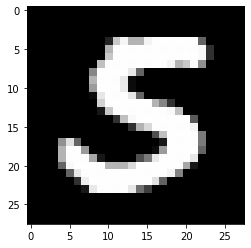

In [19]:
movie(images[:100])